In [28]:
import json
import pandas as pd
from plotnine import *
from util import get_qr_array_size

In [277]:
results = {'alpha': [], 'block_size': [], 'color_space': [], 'depth': [], 'code': [], 'channels': [], 'recovery_rate': [], 'throughput': []}


for name in ['simple', 'qr']:
    with open('results/sweep_{}.txt'.format(name)) as f:
        for line in f.readlines():
            r = json.loads(line)
            p = r['params']
            if 'version' in p:
                p['block_size'] = int(600 // get_qr_array_size({'version':p['version']}))
            results['code'].append(name)
            results['alpha'].append(p['alpha'])
            results['depth'].append(p['depth'])
            results['channels'].append(p['channels'])
            results['block_size'].append(p['block_size'])
            results['color_space'].append(p['color_space'])
            results['recovery_rate'].append(r['recovery_rate'])
            results['throughput'].append(r['throughput'])
        
results = pd.DataFrame(results)
results.channels = results.channels.apply(lambda x: len(x))

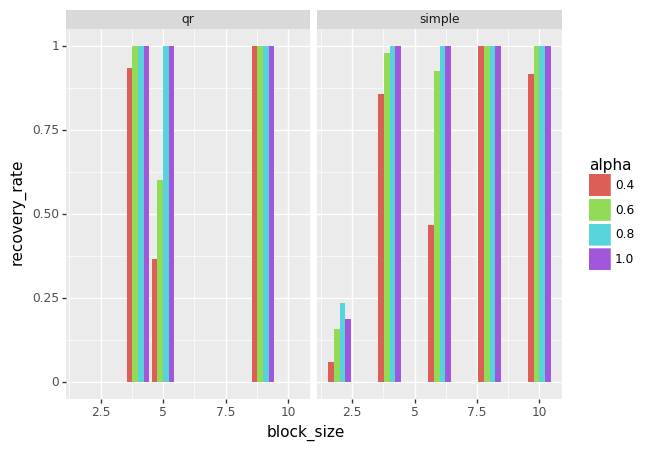

<ggplot: (-9223363262425034236)>

In [278]:
rs = results.groupby(['alpha', 'code', 'block_size'])[['alpha', 'code', 'block_size', 'recovery_rate']]
rs = rs.max().reset_index()
rs.alpha = rs.alpha.apply(lambda x: str(x))
ggplot(rs, aes(x='block_size', y='recovery_rate', fill='alpha')) \
+ geom_bar(stat='identity', position='dodge') \
+ facet_wrap('code')

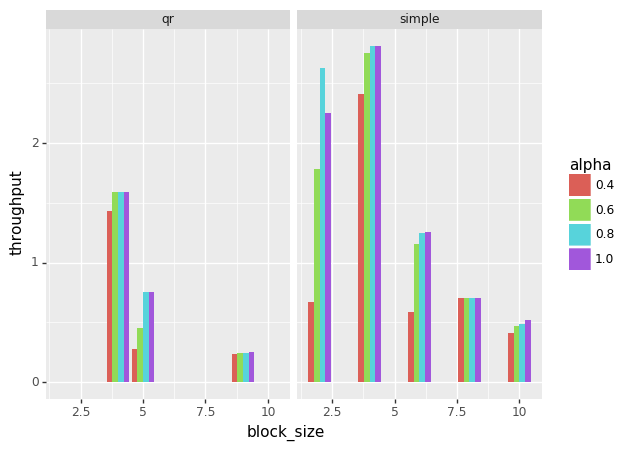

<ggplot: (-9223363262436143072)>

In [279]:
rs = results.groupby(['alpha', 'code', 'block_size'])[['alpha', 'code', 'block_size', 'throughput']]
rs = rs.max().reset_index()
rs.alpha = rs.alpha.apply(lambda x: str(x))
ggplot(rs, aes(x='block_size', y='throughput', fill='alpha')) \
+ geom_bar(stat='identity', position='dodge') \
+ facet_wrap('code')

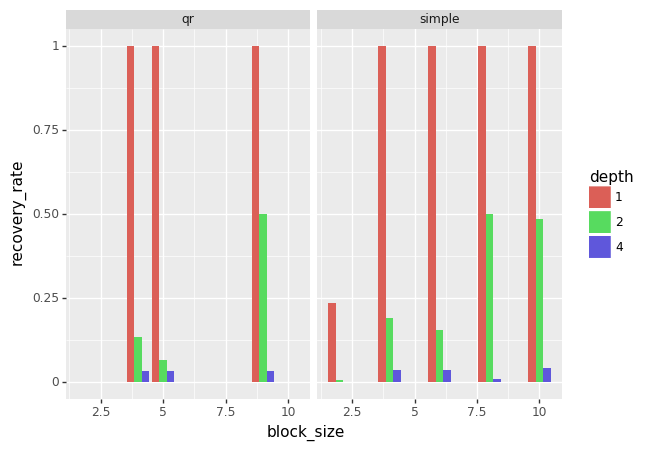

<ggplot: (-9223363262424915431)>

In [280]:
rs = results.groupby(['depth', 'code', 'block_size'])[['depth', 'code', 'block_size', 'recovery_rate']]
rs = rs.max().reset_index()
rs.depth = rs.depth.apply(lambda x: str(x))
ggplot(rs, aes(x='block_size', y='recovery_rate', fill='depth')) \
+ geom_bar(stat='identity', position='dodge') \
+ facet_wrap('code')

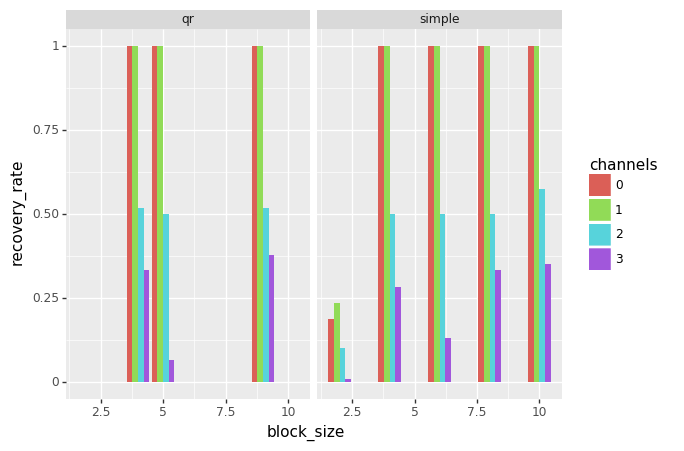

<ggplot: (8774418965810)>

In [281]:
rs = results.groupby(['channels', 'code', 'block_size'])[['channels', 'code', 'block_size', 'recovery_rate']]
rs = rs.max().reset_index()
rs.channels = rs.channels.apply(lambda x: str(x))
ggplot(rs, aes(x='block_size', y='recovery_rate', fill='channels')) \
+ geom_bar(stat='identity', position='dodge') \
+ facet_wrap('code')

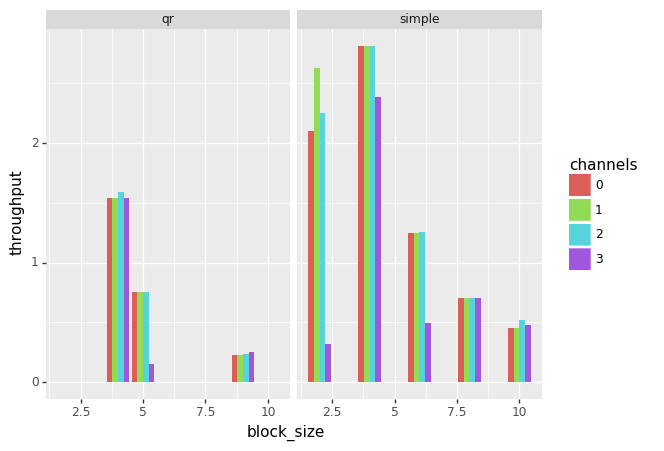

<ggplot: (-9223363262436269964)>

In [282]:
rs = results.groupby(['channels', 'code', 'block_size'])[['channels', 'code', 'block_size', 'throughput']]
rs = rs.max().reset_index()
rs.channels = rs.channels.apply(lambda x: str(x))
ggplot(rs, aes(x='block_size', y='throughput', fill='channels')) \
+ geom_bar(stat='identity', position='dodge') \
+ facet_wrap('code')

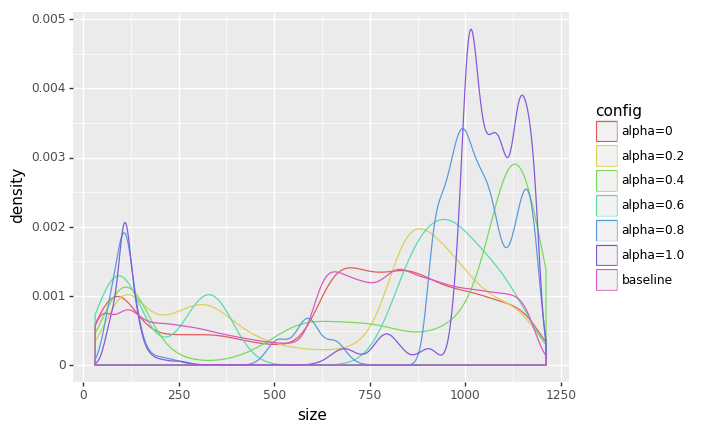

<ggplot: (8774418188110)>

In [293]:
files = [
    ('measurement_2/alpha0', 'alpha=0'),
    ('measurement_2/alpha2', 'alpha=0.2'),
    ('measurement_2/alpha4', 'alpha=0.4'),
    ('measurement_2/alpha6', 'alpha=0.6'),
    ('measurement_2/alpha8', 'alpha=0.8'),
    ('measurement_2/alpha10', 'alpha=1.0'),
    ('measurement_2/baseline_wifi', 'baseline')
]
packet_size0 = {'config': [] , 'size': []}
for file, name in files:
    file_dir = 'results/skype_packet_recordings/{}.txt'.format(file)
    for line in open(file_dir).readlines():
        try:
            size = int(line.split('Len=')[1])
            packet_size0['config'].append(name)
            packet_size0['size'].append(size)
        except:
            pass
packet_size0 = pd.DataFrame(packet_size0)
ggplot(packet_size0) + geom_density(aes(x='size', color='config'))

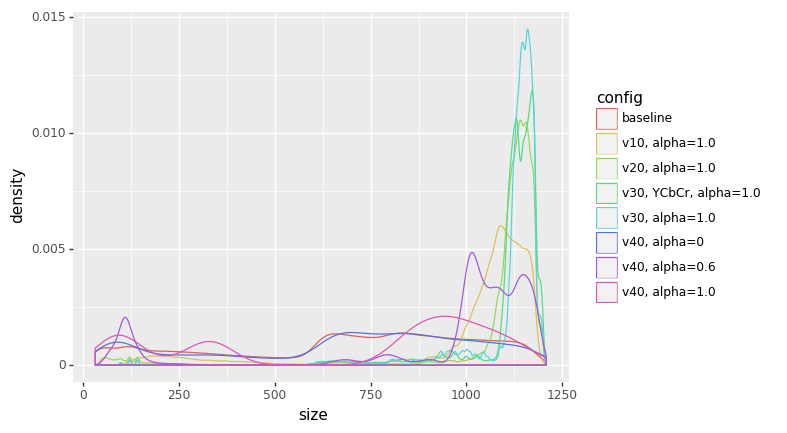

<ggplot: (8774417770055)>

In [306]:
files = [
    ('measurement_2/alpha6', 'v40'),
    ('version_and_ycbcr/v10', 'v10'),
    ('version_and_ycbcr/v20', 'v20'),
    ('version_and_ycbcr/v30', 'v30'),
    ('version_and_ycbcr/ycbcr', 'v30, YCbCr'),
    ('measurement_2/baseline_wifi', 'baseline')
]
packet_size1 = {'config': [] , 'size': []}
for file, name in files:
    file_dir = 'results/skype_packet_recordings/{}.txt'.format(file)
    for line in open(file_dir).readlines():
        try:
            size = int(line.split('Len=')[1])
            packet_size1['config'].append(name)
            packet_size1['size'].append(size)
            packet_size1['weight'].append(weight)
        except:
            pass
packet_size1 = pd.DataFrame(packet_size1)
ggplot(packet_size1) + geom_density(aes(x='size', color='config')) 